In [1]:
import pandas as pd
import numpy as np
import scipy as sc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Предсказание Легендарности покемона

Команда исследователей по имеющемуся вектору признаков желает знать относится ли наш зверь к классу легендарных или же нет.

* признаки имеют интуитивную интерпретацию

* целевой меткой выступает колонка "Legendary"

In [2]:
raw_data = pd.read_csv("Pokemon.csv",index_col = 1)
raw_data.drop("#",axis = 1,inplace = True)

In [3]:
raw_data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Видим категориальные признаки и пропуски

In [4]:
print ("Количество пропусков в наборе данных: \n",raw_data.isna().sum())

Количество пропусков в наборе данных: 
 Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [5]:
raw_data.Legendary.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

Целевая метка несбалансирована

In [6]:
types = raw_data["Type 2"].value_counts().index

Разобьем категориальные признаки на бинарные

In [7]:
raw_data["No second type"] = raw_data["Type 2"].apply(lambda x: 1 if pd.isnull(x) else 0)

for pokemon_type in types:
    raw_data[pokemon_type] = raw_data["Type 1"].apply(lambda x: 1 if x == pokemon_type else 0)
    raw_data.loc[raw_data["Type 2"] == pokemon_type,pokemon_type] = raw_data.loc[raw_data["Type 2"] == pokemon_type,
                                                                                 pokemon_type].apply(lambda x: 1)
raw_data["Legendary"] = raw_data["Legendary"].apply(lambda x: 1 if x  else 0)

In [8]:
raw_data.iloc[:,:-1].corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,No second type,...,Steel,Dark,Dragon,Rock,Ice,Water,Ghost,Fire,Electric,Normal
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758,-0.185945,...,0.109703,0.056154,0.229705,0.032731,0.060248,-0.021665,0.003641,0.078726,0.020971,-0.105331
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,-0.056452,...,-0.043037,0.009986,0.138023,-0.035514,0.082021,0.029906,-0.062262,0.010371,-0.061303,0.111999
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,-0.133223,...,0.107505,0.143057,0.212999,0.101043,0.021007,-0.070578,-0.015735,0.046438,-0.075471,-0.074769
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,-0.193868,...,0.350559,-0.024293,0.105864,0.298242,0.020174,0.006259,0.060864,-0.035472,-0.060502,-0.174609
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,-0.133906,...,-0.005608,0.036953,0.194388,-0.106214,0.070236,0.025885,0.035184,0.181970,0.127434,-0.184013
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,-0.136391,...,0.103424,-0.021162,0.139235,0.019179,0.060370,-0.024765,0.044885,0.025719,0.016502,-0.112124
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,-0.079770,...,-0.098291,0.067976,0.123244,-0.165331,-0.005371,-0.049030,-0.060599,0.072541,0.130356,0.052224
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794,-0.054193,...,0.078924,0.093959,0.102059,0.009356,0.037865,-0.104981,0.155587,0.006327,0.005638,-0.036168
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000,-0.058254,...,0.019437,-0.021419,0.225625,-0.012571,0.041136,-0.065781,-0.014494,0.047219,0.017719,-0.086246
No second type,-0.185945,-0.056452,-0.133223,-0.193868,-0.133906,-0.136391,-0.079770,-0.054193,-0.058254,1.000000,...,-0.194483,-0.149571,-0.135638,-0.183143,-0.062742,-0.012327,-0.131043,-0.026556,0.029711,0.088389


У целевой метки нет линейной зависимости с вещественными признаками

In [9]:
Legendary = raw_data["Legendary"]
raw_data = raw_data.drop("Legendary",axis = 1)
raw_data["Legendary"] = Legendary

raw_data = raw_data.drop(["Type 1","Type 2"],axis = 1)

Признаки имеют разный масштаб,по этой причине большие по величине признаки могут иметь более сильное влияние на модель.Следует их промасштабировать

In [10]:
raw_data.mean(axis = 0)

Total             435.10250
HP                 69.25875
Attack             79.00125
Defense            73.84250
Sp. Atk            72.82000
Sp. Def            71.90250
Speed              68.27750
Generation          3.32375
No second type      0.48250
Flying              0.12625
Ground              0.08375
Poison              0.07750
Psychic             0.11250
Fighting            0.06625
Grass               0.11875
Fairy               0.05000
Steel               0.06125
Dark                0.06375
Dragon              0.06250
Rock                0.07250
Ice                 0.04750
Water               0.15750
Ghost               0.05750
Fire                0.08000
Electric            0.06250
Normal              0.12750
Bug                 0.09000
Legendary           0.08125
dtype: float64

Разобьем выборку на обучающую и тестовую

In [11]:
from sklearn.utils import shuffle
raw_data = shuffle(raw_data,random_state = 0)

In [12]:
from sklearn.model_selection import train_test_split

(Train_source,Test_source,
 y_train,y_test) = train_test_split(raw_data.drop("Legendary",axis = 1),raw_data["Legendary"],
                                   test_size = 0.33,stratify = raw_data["Legendary"],random_state = 0)

Масштабируем обучающую и контрольную выборку

In [13]:
from sklearn.preprocessing import MinMaxScaler

Отдельно масштабируем обучающую и контрольную выборки

In [14]:
scaler = MinMaxScaler()
feature_scale = Train_source.columns[:8].values

In [15]:
train_indexes = Train_source.index
scaler.fit(Train_source.loc[:,feature_scale])
Train_feature = scaler.transform(Train_source.loc[:,feature_scale])
df_feature = pd.DataFrame(Train_feature,index = train_indexes,columns = feature_scale)
nonscale = pd.DataFrame(Train_source.iloc[:,8:],index = train_indexes)

Train_data = pd.concat([df_feature,nonscale],axis = 1)

In [16]:
Train_data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,No second type,Flying,...,Dark,Dragon,Rock,Ice,Water,Ghost,Fire,Electric,Normal,Bug
Name,,,,,,,,,,,,,,,,,,,,,
HoundoomMega Houndoom,0.694915,0.291339,0.459459,0.377778,0.706522,0.500000,0.628571,0.2,0,0,...,1,0,0,0,0,0,1,0,0,0
Muk,0.525424,0.409449,0.540541,0.311111,0.298913,0.571429,0.257143,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
Aurorus,0.561017,0.480315,0.389189,0.297778,0.483696,0.514286,0.302857,1.0,0,0,...,0,0,1,1,0,0,0,0,0,0
GroudonPrimal Groudon,0.983051,0.389764,0.945946,0.688889,0.760870,0.500000,0.485714,0.4,0,0,...,0,0,0,0,0,0,1,0,0,0
SharpedoMega Sharpedo,0.627119,0.271654,0.729730,0.288889,0.543478,0.321429,0.571429,0.4,0,0,...,1,0,0,0,1,0,0,0,0,0


In [17]:
test_indexes = Test_source.index
Test_feature = scaler.transform(Test_source.loc[:,feature_scale])
df_feature_t = pd.DataFrame(Test_feature,index = test_indexes,columns = feature_scale)
nonscale_t = pd.DataFrame(Test_source.iloc[:,8:],index = test_indexes)

Test_data = pd.concat([df_feature_t,nonscale_t],axis = 1)

In [18]:
Test_data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,No second type,Flying,...,Dark,Dragon,Rock,Ice,Water,Ghost,Fire,Electric,Normal,Bug
Name,,,,,,,,,,,,,,,,,,,,,
Tepig,0.200000,0.251969,0.313514,0.177778,0.190217,0.178571,0.228571,0.8,1,0,...,0,0,0,0,0,0,1,0,0,0
Kricketot,0.006780,0.141732,0.108108,0.160000,0.081522,0.150000,0.114286,0.6,1,0,...,0,0,0,0,0,0,0,0,0,1
Kingdra,0.593220,0.291339,0.486486,0.400000,0.461957,0.535714,0.457143,0.2,0,0,...,0,1,0,0,1,0,0,0,0,0
Horsea,0.177966,0.114173,0.189189,0.288889,0.326087,0.035714,0.314286,0.0,1,0,...,0,0,0,0,1,0,0,0,0,0
Larvesta,0.288136,0.212598,0.432432,0.222222,0.217391,0.250000,0.314286,0.8,0,0,...,0,0,0,0,0,0,1,0,0,1


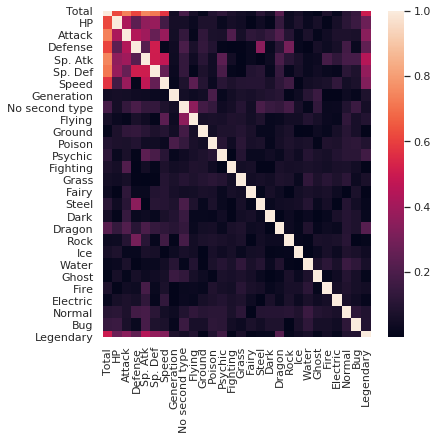

In [19]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = raw_data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(6, 6)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
X_train = Train_data
X_test = Test_data

In [21]:
print ("Количество 1-го класса:",len(X_train[y_train.values == 1]))
print ("Количество 2-го класса:",len(X_train[y_train.values == 0]))

Количество 1-го класса: 44
Количество 2-го класса: 492


* на обучающей выборке метки классов несбалансированы,дополним 1й класс случайно выбранными из него элементами

In [22]:
np.random.seed(0)
indices_to_add = np.random.randint(0,44,492-44)
indexes = np.arange(0,len(X_train),1)
X_train_to_add = X_train[y_train.values == 1].iloc[indices_to_add]
y_train_to_add = np.linspace(1,1,492 - 44)

X_train = pd.concat([X_train,X_train_to_add])
y_train  = np.hstack((y_train.values,y_train_to_add))

In [23]:
print ("Количество 1-го класса:",len(X_train[y_train == 1]))
print ("Количество 2-го класса:",len(X_train[y_train == 0]))

Количество 1-го класса: 492
Количество 2-го класса: 492


In [24]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

random.seed(0)
# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=5)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
# Есть и другие метрики качества - о них будет рассказано на следующей лабе
print ("Метрика качества построенного классификатора:",clf.score(X_test, y_test))

Метрика качества построенного классификатора: 0.8787878787878788


In [25]:
def plot_graph(method):
    train_scores = {}
    test_scores = {}
    best_score = - 100
    best_knn = 0
    for n in range(1, 41):
        random.seed(0)
        clf = KNeighborsClassifier(n_neighbors=n,weights = method)
        clf.fit(X_train, y_train)
        # значение качества на текущей итерации:
        current_train_score = clf.score(X_train, y_train)
        current_test_score = clf.score(X_test, y_test)
        if current_test_score > best_score:
            best_score = current_test_score
            best_knn = n
        # запишем его в наши словари
        train_scores[n] = current_train_score
        test_scores[n] = current_test_score
    return [(train_scores,test_scores),best_knn,best_score]

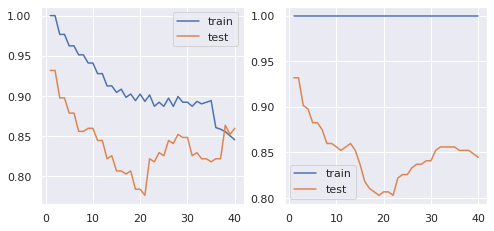

Best k and score for uniform method: 1 0.9318
Best k and score for distance method: 1 0.9318


In [26]:
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.


result_one = plot_graph("uniform")
result_second = plot_graph("distance")


pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
plt.plot(list(result_one[0][0].keys()), list(result_one[0][0].values()), label= 'train')
plt.plot(list(result_one[0][1].keys()), list(result_one[0][1].values()), label='test')
plt.legend()

pyplot.subplot(2, 2, 2)
plt.plot(list(result_second[0][0].keys()), list(result_second[0][0].values()), label= 'train')
plt.plot(list(result_second[0][1].keys()), list(result_second[0][1].values()), label='test')
plt.legend()

plt.show()
print ("Best k and score for uniform method:",result_one[1],round(result_one[2],4))
print ("Best k and score for distance method:",result_second[1],round(result_one[2],4))

Вопрос: Какое количество соседей лучше всего брать для этой задачи?

* По данным графикам нельзя дать однозначный ответ,обучение и контроль проводится на одном разбиении.Для более точного ответа необходимо применять кросс-валидацию.
* При k=1 алгоритм ближайшего соседа неустойчив к шумовым выбросам: он даёт ошибочные классификации не только на самих объектах-выбросах, но и на ближайших к ним объектах других классов. При k=m, наоборот, алгоритм чрезмерно устойчив и вырождается в константу. Таким образом, крайние значения k нежелательны.
* В методе ближайших соседей лучшее качество на контрольной выборке получилось при 1 соседе
* Метод distance достигает наилучшего качества при 1 соседе

### Используем кросс-валидацию

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
def plot_cv_graph(method):
    train_scores = {}
    test_scores = {}
    best_score = - 100
    best_knn = 0
    for n in range(1, 41):
        random.seed(0)
        clf = KNeighborsClassifier(n_neighbors=n,weights = method)
        clf.fit(X_train, y_train)
        # значение качества на текущей итерации:
        current_train_score = cross_val_score(clf,X_train,y_train,cv = 3).mean()
        current_test_score = cross_val_score(clf,X_test, y_test,cv = 3).mean()
        if current_test_score > best_score:
            best_score = current_test_score
            best_knn = n
        # запишем его в наши словари
        train_scores[n] = current_train_score
        test_scores[n] = current_test_score
    return [(train_scores,test_scores),best_knn,best_score]

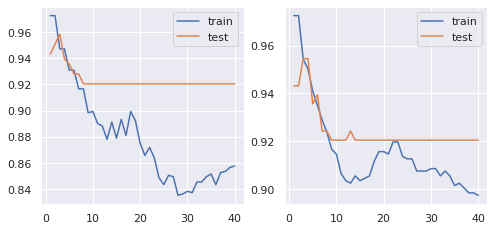

Best k and score for uniform method: 3 0.9318
Best k and score for distance method: 3 0.9318


In [31]:
result_cv_one = plot_cv_graph("uniform")
result_cv_second = plot_cv_graph("distance")

pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
plt.plot(list(result_cv_one[0][0].keys()), list(result_cv_one[0][0].values()), label= 'train')
plt.plot(list(result_cv_one[0][1].keys()), list(result_cv_one[0][1].values()), label='test')
plt.legend()

pyplot.subplot(2, 2, 2)
plt.plot(list(result_cv_second[0][0].keys()), list(result_cv_second[0][0].values()), label= 'train')
plt.plot(list(result_cv_second[0][1].keys()), list(result_cv_second[0][1].values()), label='test')
plt.legend()

plt.show()
print ("Best k and score for uniform method:",result_cv_one[1],round(result_one[2],4))
print ("Best k and score for distance method:",result_cv_second[1],round(result_one[2],4))

Вопрос: Какое количество соседей лучше всего брать для этой задачи?

* Мы получили более достоверное значение метрики качества,полученного путем усреднения значений на кросс-валидации
* В методе ближайших соседей лучшее качество на контрольной выборке получилось при 3 соседях
* Метод distance достигает наилучшего качества при 3 соседях

### Сравним с центроидным классификатором

In [31]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

centroid = NearestCentroid()
centroid.fit(X_train, y_train)
NearestCentroid(metric='euclidean', shrink_threshold=None)
print ("Метрика качества центроидного классификатора:",centroid.score(X_test,y_test))

Метрика качества центроидного классификатора: 0.8863636363636364


Центроидный классификатор на данном наборе данных имеет меньшую точность

### Задача регрессии для общей силы покемона

По имеющемся набору признаков хотим предсказать общую мощность нашего покемона

* Целевая метка "Total" имеет вещественный характер
* Следовательно поставим задачу регрессии

In [32]:
X_train["Legendary"] = y_train
Test_data["Legendary"] = y_test

In [33]:
Xr_train = X_train.iloc[:,1:]
yr_train = X_train["Total"]

Xr_test = Test_data.iloc[:,1:]
yr_test = Test_data["Total"]

In [34]:
random.seed(0)

from sklearn.neighbors import KNeighborsRegressor
# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf_r = KNeighborsRegressor(n_neighbors=3)
# обучим классификатор на тренировочной выборке
clf_r.fit(Xr_train, yr_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
# Есть и другие метрики качества - о них будет рассказано на следующей лабе
print ("Метрика качества построенного классификатора:",clf_r.score(Xr_test, yr_test))

Метрика качества построенного классификатора: 0.5466787128327772


In [35]:
def plot_regr_graph(method):
    train_scores = {}
    test_scores = {}
    best_score = - 100
    best_knn = 0
    for n in range(1, 41):
        clf = KNeighborsRegressor(n_neighbors=n,weights = method)
        clf.fit(Xr_train, yr_train)
        # значение качества на текущей итерации:
        current_train_score = clf.score(Xr_train, yr_train)
        current_test_score = clf.score(Xr_test, yr_test)
        if current_test_score > best_score:
            best_score = current_test_score
            best_knn = n
        # запишем его в наши словари
        train_scores[n] = current_train_score
        test_scores[n] = current_test_score
    return [(train_scores,test_scores),best_knn,best_score]

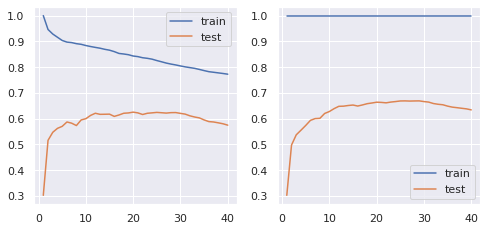

Best k and score for uniform method: 20 0.625
Best k and score for distance method: 29 0.625


In [36]:
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.


result_one = plot_regr_graph("uniform")
result_second = plot_regr_graph("distance")


pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
plt.plot(list(result_one[0][0].keys()), list(result_one[0][0].values()), label= 'train')
plt.plot(list(result_one[0][1].keys()), list(result_one[0][1].values()), label='test')
plt.legend()

pyplot.subplot(2, 2, 2)
plt.plot(list(result_second[0][0].keys()), list(result_second[0][0].values()), label= 'train')
plt.plot(list(result_second[0][1].keys()), list(result_second[0][1].values()), label='test')
plt.legend()

plt.show()
print ("Best k and score for uniform method:",result_one[1],round(result_one[2],4))
print ("Best k and score for distance method:",result_second[1],round(result_one[2],4))